# Aufgabe 2: Regression einer beliebige Funktion

Deine Aufgabe ist es ein neuronales Netz zu bauen, dass eine von Dir definierte mathematische Funktion lernt.
Dein Netz soll als Input einen X-Wert bekommen und dazu den Y-Wert der gelernten mathematischen Funktion berechnen.

### Hinweis
Optimiere das Lernen (`model.fit`) durch das Setzen des Parameters `batch_size` auf die Anzahl der X-Werte.
Damit jupyter notebook sich beim Lernen nicht aufhängt, setze auch zusätzlich den Paramter `verbose=0`.

In [1]:
# Plots sollen inline im notebook angezeigt werden
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from torch import Tensor
from typing import Callable
import matplotlib.pyplot as plt

In [2]:
def showPredictions(samples: list, values: list, predictions: list) -> None:
    """
    :param samples: list of samples (x-axis)
    :param values: list of true values (y-axis)
    :param predictions: list of predicted values (y-axis)
    :return: None
    """
    plt.plot(samples, values, 'o', samples, predictions, '-')
    plt.legend(['data', 'prediction'], loc='best')
    plt.show()

def showProgress(history, label):
    plt.plot(history, label=label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('loss')
    plt.xlabel('iterations')

### Good Old Fashioned Linear Regression

In [3]:
def linreg(X: Tensor, Y: Tensor) -> Callable:
    """
    :param X: feature matrix
    :param Y: target vector
    :return: a function prediction Y given X_test
    """
    U = Y.t().mm(X)
    V = X.t().mm(X).inverse()
    W = U.mm(V)
    return lambda X_test: X_test.mm(W.t())

### The Ubiquitous Learner

In [4]:
class Learner(object):
    def __init__(self, M, optimizer, loss_fct, pred_fct, n_epoch):
        self.M = M
        self.optimizer = optimizer
        self.loss_fct = loss_fct
        self.pred_fct = pred_fct
        self.n_epoch = n_epoch

    def fit(self, X, Y):
        cnt = 0
        history = []

        while cnt < self.n_epoch:
            loss = self.loss_fct(self.M(X), Y)
            history.append(loss.item())
            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()
            cnt += 1

        return history

    def predict(self, X):
        return self.pred_fct(self.M(X))

### Define the Problem

In [5]:
m = 20  # number of samples
n = 2  # degree of polynom

f = torch.cos   # function to approximate
# f = lambda x: 1 + x + x**2

samples = torch.linspace(-1, 1, steps=m, dtype=torch.float32)
aux = [samples.pow(k)  for k in range(n + 1)]
X = torch.cat(aux, 0).reshape(n + 1, m).t()   # shape = (m, (n+1))
Y = f(samples).view(m, 1)  # shape = (m, 1)

# X[:, 1]  is column 1 of X = samples
# Y[:, 0]  is column 0 of Y = f(samples)

### Apply Linear Regression

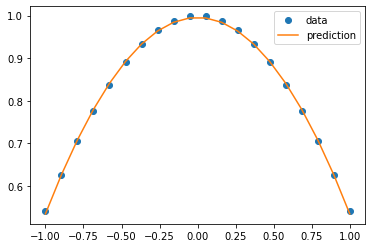

In [6]:
predict = linreg(X, Y)
Y_pred = predict(X)
showPredictions(X[:, 1], Y[:, 0], Y_pred[:, 0])


### Apply Linear Regression from sklearn

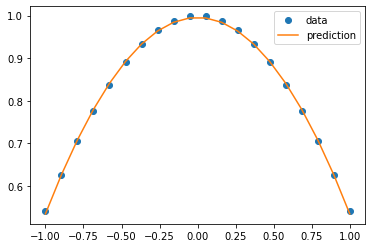

score = 0.9994


In [7]:
from sklearn.linear_model import LinearRegression
R = LinearRegression()
R.fit(X, Y)
Y_pred = R.predict(X)
showPredictions(X[:, 1], Y[:, 0], Y_pred[:, 0])
print (f'score = {R.score(X, Y):.4f}')

### Define a Neuronal Network

In [8]:
lr = 0.1
n_epoch = 100

# G = nn.Sequential(nn.Linear(n+1, 1, bias=False), nn.Sigmoid())
M = nn.Linear(n+1, 1, bias=False)
optimizer = optim.Adam(M.parameters(), lr=lr)
loss_fct = nn.MSELoss()
pred_fct = lambda Y : Y.detach()


### Train and Apply the Neuronal Network

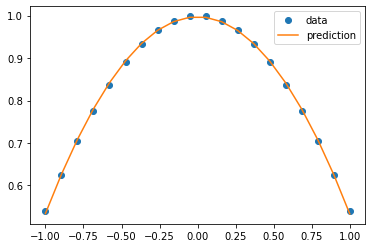

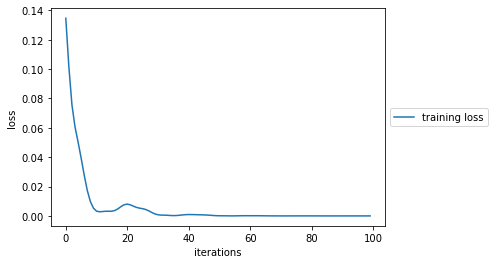

In [9]:
# useful for simple testcases
# d = {'weight': torch.tensor([[1., 1., 1.]])}
# G.load_state_dict(d)

learner = Learner(M, optimizer, loss_fct, pred_fct, n_epoch)
history = learner.fit(X, Y)
Y_pred = learner.predict(X)
showPredictions(X[:, 1], Y[:, 0], Y_pred[:, 0])
showProgress(history, 'training loss')